In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '..')
import pandas as pd
import numpy as np
from libgen.file_io import *
from libgen.search_utils import *
from libgen.Tylos import *
from libgen.spectra_plotter import EIC
from libgen.constant import *
from libgen.spectra_plotter import *
from libgen.libgen_core import *
from libgen.chem_utils import *
from libgen.spectral_operations import *

In [4]:
# this is 10x
from libgen.constant import adduct_pos, adduct_neg
# conc = '10x'
conc = '100x'
mzml_dir = f'/Volumes/New Volume/drugLib/04032025_{conc}dil_mzml'

# conc = '10x'
master_base = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/DrugLib/'
i = 0
for polarity in ['pos','neg']:
    for tail in ['01', '02']:
        std_list = pd.read_csv(os.path.join(master_base, conc, polarity, f'std_{tail}_cleaned.csv'))
        if polarity == 'pos':
            adduct = adduct_pos
        else:
            adduct = adduct_neg
        library = libgen_pipeline(std_list, mzml_dir, adduct)
        write_to_msp(library, os.path.join(master_base, conc, polarity, f'lib_{tail}.msp'))
        i += 1
        print(f'Finished {i} libraries')
    #     break
    # break

making all matches...


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]

there are 384 features found to matches with precursor mz at 0.005 error
denoising...



100%|██████████| 384/384 [00:02<00:00, 161.22it/s]


Finished 1 libraries
making all matches...


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]

there are 375 features found to matches with precursor mz at 0.005 error
denoising...



100%|██████████| 375/375 [00:02<00:00, 151.40it/s]


Finished 2 libraries
making all matches...


100%|██████████| 7/7 [00:07<00:00,  1.11s/it]

there are 59 features found to matches with precursor mz at 0.005 error
denoising...



100%|██████████| 59/59 [00:00<00:00, 69984.14it/s]


Finished 3 libraries
making all matches...


100%|██████████| 7/7 [00:07<00:00,  1.10s/it]

there are 56 features found to matches with precursor mz at 0.005 error
denoising...



100%|██████████| 56/56 [00:00<00:00, 34465.30it/s]


Finished 4 libraries


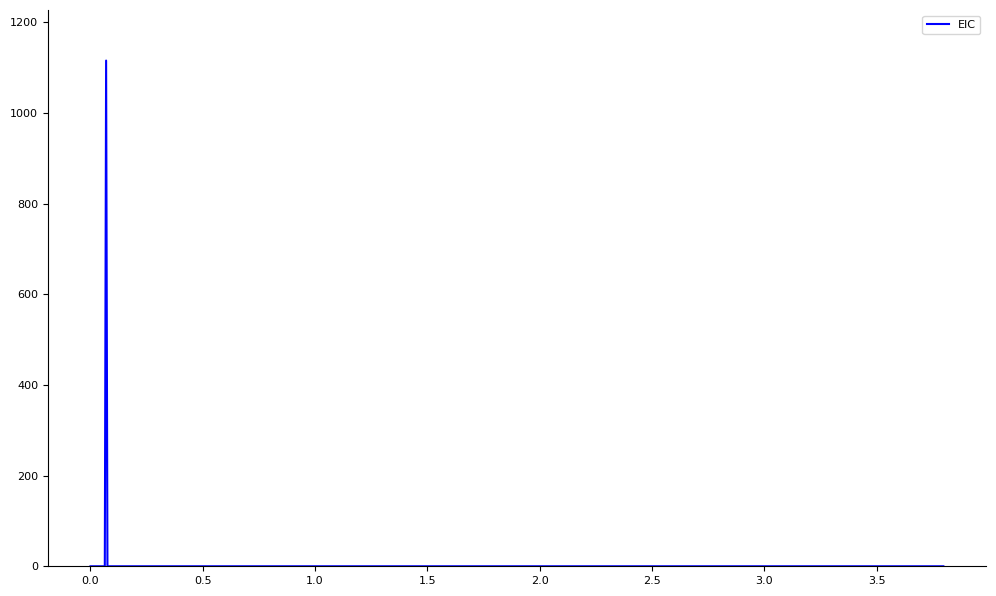

In [297]:
mix = 'posNIH_Drug_group2_10Xdil_01'
mass = 332.095106
ms1, ms2 = read_mzml(os.path.join(mzml_dir, mix))
mass_sorted, intensity_sorted, index_sorted, rt_list = build_index(ms1)
intensity_list = flash_eic(mass, mass_sorted, intensity_sorted, index_sorted)
EIC(rt_list, intensity_list)

In [281]:
mass_tolerance = 0.005
peaks_all, raw_apex_idx_all,reci_snrs_all = detect_all_peaks(intensity_list, n_neighbor=2, intensity_threshold=30000)
idx_left, idx_right = mass_sorted.searchsorted([mass-mass_tolerance, mass+mass_tolerance])

In [282]:
for p, r, a in zip(peaks_all, reci_snrs_all, raw_apex_idx_all):
    pmz_statistics = guess_pmz(mass, mass_sorted,
                                    intensity_sorted, index_sorted, idx_left, idx_right, int(a), mass_error= mass_tolerance)

In [283]:
pmz_statistics

(np.float64(347.2215703759262),
 np.float64(980170.0625),
 np.float64(347.22137451171875))